In [1]:
# Import the necessary packages

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as mpgs
import glob
%matplotlib inline

In [2]:
# Helper function to merge two lists of images, alternating between both lists
# This is required to display images for comparison

def merge_lists(imgarray1, imgarray2, count=None):
    
    if count is None:
        count = len(imgarray1)
    output = []
    for i in range(count):
        output.append(imgarray1[i])
        output.append(imgarray2[i])
    
    return output

In [3]:
# Helper function to display images
# The input array should contain an even number of images

def display_images(imgarray, titles=None, cmap=None):
    ncols = 2
    nrows = int(len(imgarray)/2)
    figsize = (ncols*9, nrows*7)
        
    fig = plt.figure(figsize=figsize)
    gs = mpgs.GridSpec(nrows, ncols)
    gs.update(bottom=0.375)
    for i in range(len(imgarray)):
        sub = plt.subplot(gs[i])
        if titles is not None:
            sub.set_title(titles[i], size=17)
        sub.imshow(imgarray[i], cmap=cmap)

In [4]:

# Helper function to apply a region of interest mask# Helpe 

def region_mask(img):
    
    # Create an all-zero mask
    mask = np.zeros_like(img)
    out_mask_color = 1
    mask = mask.astype(np.float32)
    
    # Define polygon co-ordinates
    bottom_left = [235, 668]
    top_left = [595, 435]
    top_right = [705, 435]
    bottom_right = [1060, 668]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)


    # Fill poly and apply to the mask
    cv2.fillPoly(mask, vertices, out_mask_color)
    
    # Retain only the ROI on the original image
    mask = mask.astype(np.uint8)
    img = img.astype(np.uint8)
    masked_image = cv2.bitwise_and(img, img, mask=mask)
    
    return masked_image

In [5]:
# Helper function to apply color thresholding

def color_filters(img, s_thresholds=(100,255)):
    
    # Convert to HLS space and isolate the S channel
    hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls_img[:,:,2]
    
    # Prepare a binary output based on thresholds
    binary_img = np.zeros_like(s_channel)
    binary_img[(s_channel > s_thresholds[0]) & (s_channel <= s_thresholds[1])] = 1
    
    return binary_img

In [11]:
# Load the sim images

filenames = glob.glob( "data\sim_training_data\sim_data_capture\*.jpg")
test_images = np.array([mpimg.imread(name) for name in filenames])

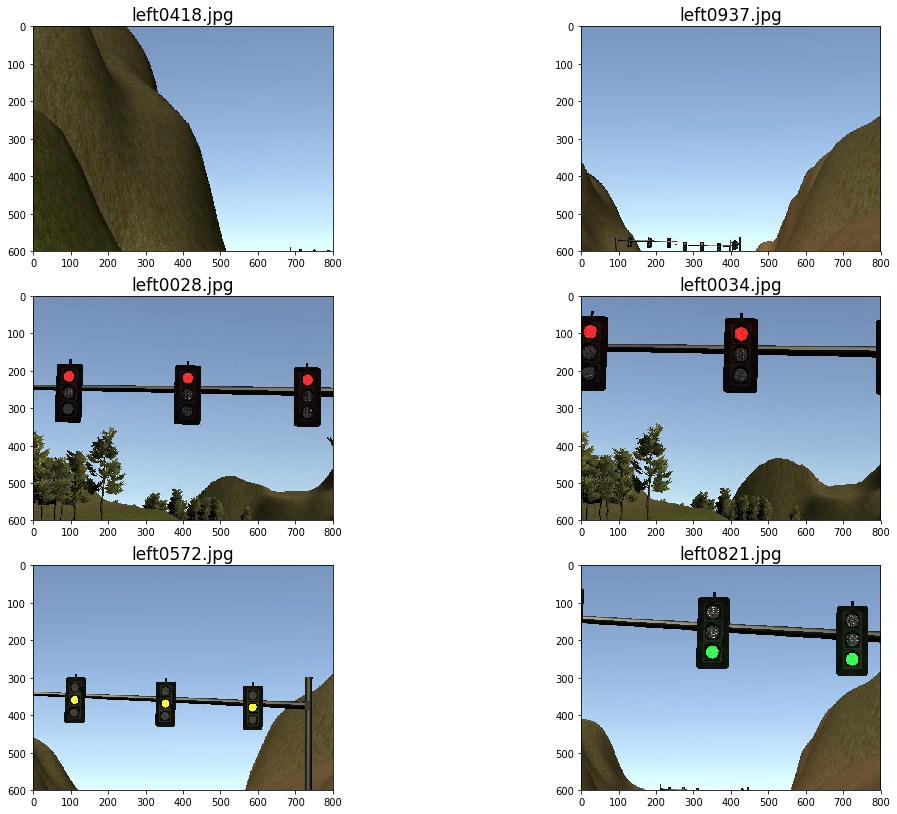

In [26]:
# Pick 6 random images to work with

random_indices = np.random.choice(len(filenames), 6, replace=False)
work_images = [test_images[i] for i in random_indices]

display_images(work_images, titles=[filenames[f].split("\\")[-1] for f in random_indices])